In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('datasets/weatherHistory.csv')
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [3]:
data['date'] = data['Formatted Date'].map(lambda date: date[:10])
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,date
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-04-01
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-04-01
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01


In [6]:
temps = data.groupby('date')['Temperature (C)'].mean().reset_index()
temps.head()

,date,Temperature (C)
0,2006-01-01,3.873148
1,2006-01-02,5.418519
2,2006-01-03,2.319444
3,2006-01-04,2.274074
4,2006-01-05,2.698148


In [7]:
temps['date'] = pd.to_datetime(temps['date'])
temps['Day of year'] = temps['date'].map(lambda date: date.dayofyear)
temps

,date,Temperature (C),Day of year
0,2006-01-01,3.873148,1
1,2006-01-02,5.418519,2
2,2006-01-03,2.319444,3
3,2006-01-04,2.274074,4
4,2006-01-05,2.698148,5
...,...,...,...
4013,2016-12-27,0.280324,362
4014,2016-12-28,0.224306,363
4015,2016-12-29,0.169676,364
4016,2016-12-30,0.119444,365


In [8]:
temps.drop('date', axis=1, inplace=True)
temps.head()

,Temperature (C),Day of year
0,3.873148,1
1,5.418519,2
2,2.319444,3
3,2.274074,4
4,2.698148,5


In [ ]:
from sklearn.model_selection import train_test_split

x = temps['Day of year'].to_numpy()
y = temps['Temperature (C)'].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.85)

Text(0, 0.5, 'temperature (C)')

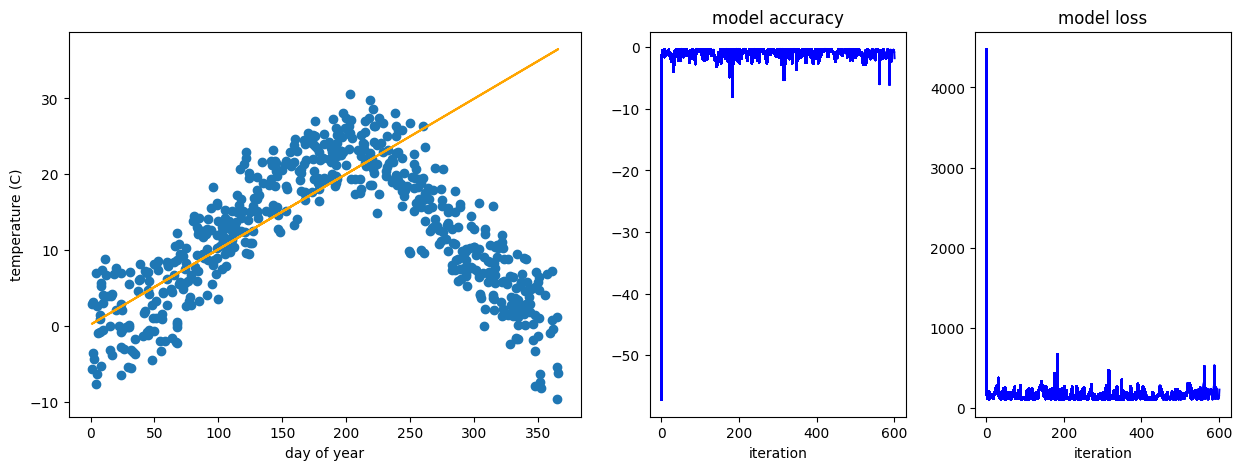

In [49]:
from my_perceptron_v3 import PerceptronAnimation

model = PerceptronAnimation(0.00001, 0.00001, 'linear')
model.fit_and_eval(x_train, y_train, 1)
model.ax1.set_xlabel('day of year')
model.ax1.set_ylabel('temperature (C)')

In [50]:
days = np.array([10,200,350])
model.predict(days)

array([ 1.18954761, 20.02782232, 34.90014446])

In [51]:
np.save('weights', model.get_weights())    